<a href="https://colab.research.google.com/github/patty1997/Deep_Learning_Projects/blob/main/transfer_learninng_VGG_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [ ]:
SIZE = 256

train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Data/train_set/*"):
  label = directory_path.split("/")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
    print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(label)


    

diseased
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/01940b6d-7dea-4889-a7b8-a35f4e9bba34___NREC_B.Spot 9120.JPG
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/0694ee73-2dbc-4583-9d2d-2b053ef0475b___NREC_B.Spot 1798.JPG
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/024623ab-be81-4d99-a653-c3be1495ce8e___JR_B.Spot 8889.JPG
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/0558ff5a-45c7-4ea0-9479-3f71f0048208___JR_B.Spot 3183.JPG
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/0719e8e8-c1ae-4d5a-b29c-dbadc36d13f3___NREC_B.Spot 1947.JPG
/content/drive/MyDrive/Colab Notebooks/Data/train_set/diseased/080b107a-192f-40ce-8942-d8ccca8dfc52___NREC_B.Spot 1872.JPG
/content/driv

In [ ]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
test_images = []
test_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Data/test_set/*"):
  fruit_label = directory_path.split("/")[-1]
  print(fruit_label)
  for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels) 

healthy
diseased


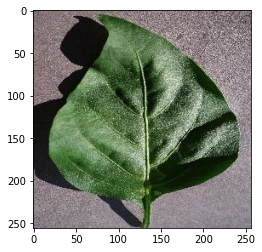

In [ ]:
plt.imshow(test_images[8])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
train_labels_encoded = le.fit_transform(train_labels)

print(np.unique(test_labels_encoded))
print(np.unique(train_labels_encoded))

[0 1]
[0 1]


In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #Normalization

In [ ]:
VGG_model = VGG16(weights='imagenet', include_top = False, input_shape=(SIZE,SIZE,3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
for layer in VGG_model.layers:
  layer.trainable = False

VGG_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
feature_extractor = VGG_model.predict(x_train)

In [ ]:
features = feature_extractor.reshape(feature_extractor.shape[0],-1)

In [ ]:
X_for_random_forest = features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [ ]:
RF_model.fit(X_for_random_forest,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_test_feature = VGG_model.predict(x_test)

In [ ]:
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [ ]:
prediction_RF = RF_model.predict(X_test_features)
prediction_RF_labels = le.inverse_transform(prediction_RF)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))
print("F1Score = ", metrics.f1_score(y_test, prediction_RF))
print("Precision = ", metrics.precision_score(y_test, prediction_RF))
print("Recall = ", metrics.recall_score(y_test, prediction_RF))

Accuracy =  0.9264214046822743
F1Score =  0.9243986254295532
Precision =  0.950530035335689
Recall =  0.8996655518394648


[[285  14]
 [ 30 269]]


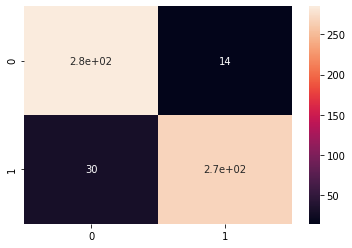

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_RF)
print(cm)
sns.heatmap(cm, annot=True)

VGG16-RandomForest: ROC AUC=0.926


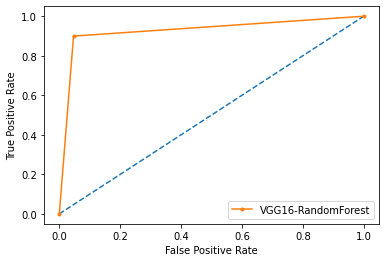

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
# predict probabilities
# keep probabilities for the positive outcome only
from sklearn.metrics import roc_auc_score, roc_curve
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, prediction_RF)
# summarize scores
# print('Center: ROC AUC=%.3f' % (ns_auc))
print('VGG16-RandomForest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, prediction_RF)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='VGG16-RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The prediction for this image is:  ['healthy']
The actual label for this image is:  healthy


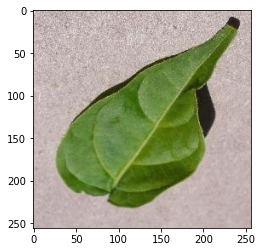

In [ ]:
n = np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
input_img_feature = VGG_model.predict(input_img)
input_img_features = input_img_feature.reshape(input_img_feature.shape[0],-1)
prediction_RF = RF_model.predict(input_img_features)[0]
prediction_RF = le.inverse_transform([prediction_RF])
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", test_labels[n])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:369: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  y_score = check_array(y_score, ensure_2d=False)


ValueError: ignored